In [6]:
import numpy as np
import matplotlib.pyplot as plt 

class MultiArmBandit:
    def __init__(self, k=10, epsilon=0.1):
        self.k = k
        self.reward = np.random.randn(k)
        self.Q = None
        self.N = None
        self.initQ()
        self.check_epsilon(epsilon)
        
    def initQ(self):
        self.Q = np.array([0.0]*self.k)
        self.N = [0]*self.k
        
    def check_epsilon(self, epsilon):
        if 0.0 <= epsilon <= 1.0:
            self.epsilon = epsilon
        else:
            raise ValueError("epsilon must be between 0 and 1")
               
    def epsilon_greedy(self):  
        if np.random.random_sample() < self.epsilon:
            action = np.random.choice(self.k)
        else:
            _max = self.Q.max()     
            max_list = np.where(self.Q == _max)[0]
            action = np.random.choice(max_list)
        return action
    
    def updateQ(self, action):
        self.N[action]+=1    
        reward = np.random.normal(self.reward[action] , 1, 1)       
        self.Q[action]+= (reward -self.Q[action])/self.N[action]
        return reward

    def pull_lever_once(self):        
        action = self.epsilon_greedy()
        return self.updateQ(action)
            
    def pull_lever(self,num_pull=1000):    
        for pull in range(num_pull):
            self.pull_lever_once()

In [76]:
bandit = MultiArmBandit()
bandit.pull_lever(100000)
print(f"True Rewards : \n {bandit.reward} \n")   
print(f"Q : \n {bandit.Q} \n")   
print(f"N : \n {bandit.N} \n")   

Rewards : 
 [-0.70050144 -0.63667425  0.47864467 -0.09086825  1.33493413 -0.03717046
 -1.18501212  2.5648789   1.44258875 -0.73999689] 

Q : 
 [-0.71068226 -0.67475395  0.49026885 -0.08217673  1.39036572 -0.06784549
 -1.14264978  2.56587521  1.4258309  -0.74804253] 

N : 
 [998, 983, 978, 984, 1024, 950, 992, 91140, 974, 977] 



In [54]:
class Simulation:
    def __init__(self, bandit = MultiArmBandit, num_sim = 2000, num_pull=1000,epsilon=0.1):
        self.bandit = MultiArmBandit
        self.num_sim = num_sim
        self.num_pull = num_pull
        self.epsilon= epsilon
    
    def run(self):
        historical_average = np.zeros(self.num_pull)
        for sim in range(self.num_sim):
            bandit = self.bandit(epsilon=self.epsilon)           
            for i in range(self.num_pull):
                reward = bandit.pull_lever_once()
                historical_average[i]+=reward              
        return historical_average/self.num_sim

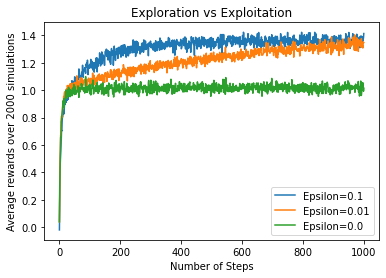

In [72]:
f, ax = plt.subplots()
epsilons = [0.1,0.01,0.0]
for eps in epsilons:
    sim = Simulation(epsilon=eps,num_sim = 2000)
    historical_average = sim.run()
    ax.plot(historical_average)
    plt.title("Exploration vs Exploitation")
    plt.xlabel("Number of Steps")
    plt.ylabel("Average rewards over 2000 simulations")
    plt.legend(("Epsilon=0.1","Epsilon=0.01","Epsilon=0.0"))

## Non Stationary Rewards

In [83]:
class NonStationaryMultiArmBandit(MultiArmBandit):
    def __init__(self, constant_alpha=True, **kwargs):
        super().__init__(**kwargs)
        self.constant_alpha = constant_alpha

    def updateQ(self, action):
        self.N[action] += 1
        reward_delta = np.random.normal(0, 0.1, self.k)
        self.reward += reward_delta
        reward = np.random.normal(self.reward[action], 1, 1)
        if self.constant_alpha:
            self.Q[action] += (reward - self.Q[action])*0.1
        else:
            self.Q[action] += (reward - self.Q[action])/self.N[action]
        return reward

In [84]:
bandit = NonStationaryMultiArmBandit()
bandit.pull_lever1(100000)
print(f"True Rewards : \n {bandit.reward} \n")   
print(f"Q : \n {bandit.Q} \n")   
print(f"N : \n {bandit.N} \n")   

True Rewards : 
 [ 18.61734253 -10.92202784   9.25248093 -15.0585759   17.86651149
 -42.40587647 -46.89786737  -8.10577937 -30.28779178 -66.88257555] 

Q : 
 [ 17.72409159  -9.7839072    7.73146582 -12.75627318  17.88415827
 -42.11937238 -44.6132347   -7.57335576 -26.3518612  -65.12319826] 

N : 
 [3025, 995, 76821, 999, 9824, 3102, 1000, 947, 2248, 1039] 



In [85]:
class NonStationarySimulation(Simulation):
    def __init__(self,
                 constant_alpha=True,
                 bandit=NonStationaryMultiArmBandit, **kwargs):
        super().__init__(**kwargs)
        self.constant_alpha = constant_alpha
        self.bandit = bandit

    def run(self):
        historical_average = np.zeros(self.num_pull)
        for sim in range(self.num_sim):
            if sim % 100 == 0:
                print(sim)
            bandit = self.bandit(epsilon=self.epsilon,
                                 constant_alpha=self.constant_alpha
                                 )
            for i in range(self.num_pull):
                reward = bandit.pull_lever_once()
                historical_average[i] += reward
        return historical_average/self.num_sim

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


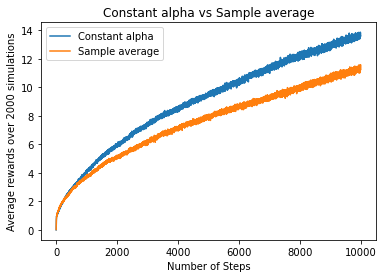

In [76]:
f, ax = plt.subplots()
eps = 0.1
constant_alphas = [True, False]
for constant_alpha in constant_alphas:
    sim = Simulation(epsilon=eps,num_sim = 2000,num_pull=10000, constant_alpha=constant_alpha)
    historical_average = sim.run()
    ax.plot(historical_average)c
    plt.title("Constant alpha vs Sample average")
    plt.xlabel("Number of Steps")
    plt.ylabel("Average rewards over 2000 simulations")
    plt.legend(("Constant alpha","Sample average"))